# Simulation of Dynamic Systems

**By Prof. J. Venkateswaran & R. Deval**



Using [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) of scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

**Scenario D1: Let's look at a simple Population dynamics.**

The rate of change of population $P(t)$ of a region is affected by its birth rate and death rate as follows

$\displaystyle \frac{dP}{dt} = Births - Deaths = bP - dP$

Sample population dynamics are shown in *Figure A*. *Red curve* represents birth rate more than death rate (*b>d*); whereas *blue curve* represents birth rate less than death rate (*b<d*).  

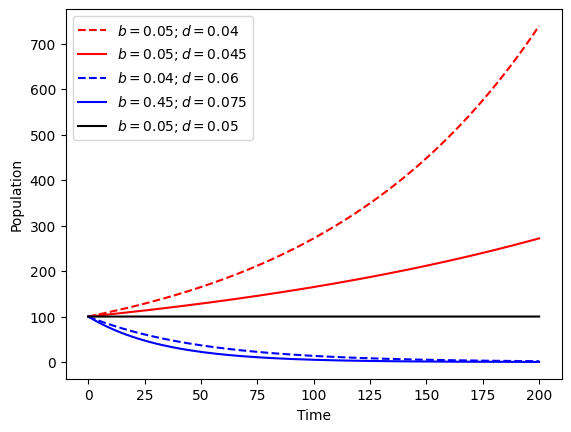

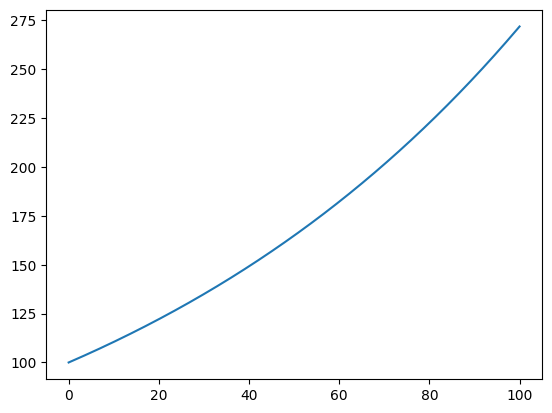

In [ ]:
#Inputs
b=0.05
d=0.04

#Initial condition
P0 = 100

#Model
def popModel(P, t, b, d): #First input is Equations/state, Time, then optional input parameters
  dP_dt = b*P - d*P
  return dP_dt

#time line
t = np.linspace(0, 100, 1000)

#simulate
Pop = odeint(popModel, P0, t, args=(b, d))

#plot
plt.plot(t, Pop)


# Add legend in the below plot

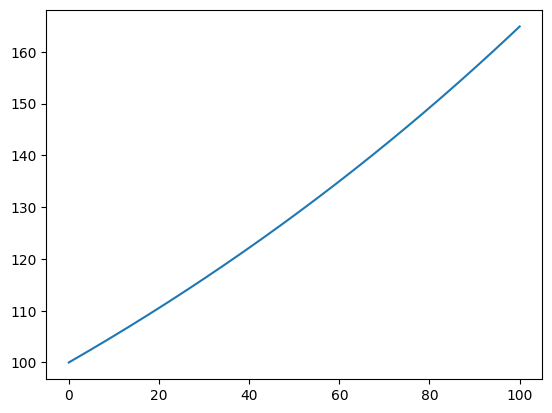

In [ ]:
b=0.05
d=0.045

#Initial condition
P0 = 100

#Model
def popModel(P, t, b, d): #First input is Equations/state, Time, then optional input parameters
  dP_dt = b*P - d*P
  return dP_dt

#time line
t = np.linspace(0, 100, 1000)

#simulate
Pop = odeint(popModel, P0, t, args=(b, d))

#plot
plt.plot(t, Pop)

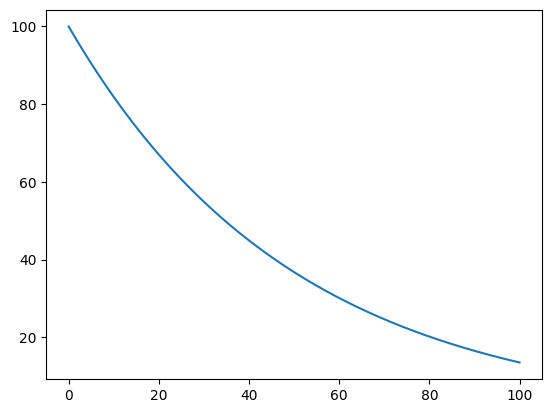

In [ ]:
b=0.04
d=0.06

#Initial condition
P0 = 100

#Model
def popModel(P, t, b, d): #First input is Equations/state, Time, then optional input parameters
  dP_dt = b*P - d*P
  return dP_dt

#time line
t = np.linspace(0, 100, 1000)

#simulate
Pop = odeint(popModel, P0, t, args=(b, d))

#plot
plt.plot(t, Pop)

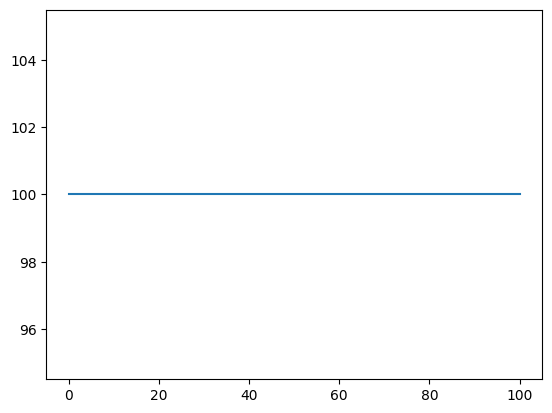

In [ ]:
b=0.05
d=0.05

#Initial condition
P0 = 100

#Model
def popModel(P, t, b, d): #First input is Equations/state, Time, then optional input parameters
  dP_dt = b*P - d*P
  return dP_dt

#time line
t = np.linspace(0, 100, 1000)

#simulate
Pop = odeint(popModel, P0, t, args=(b, d))

#plot
plt.plot(t, Pop)

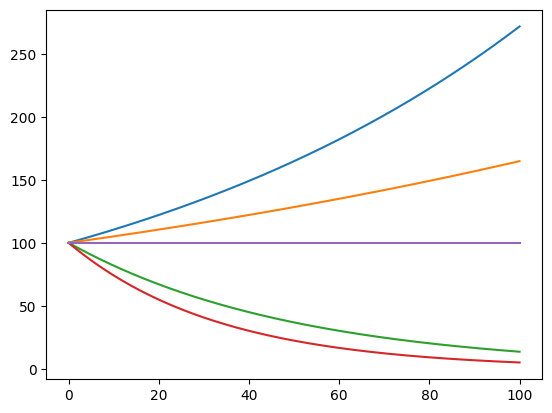

In [ ]:
Pop1 = odeint(popModel, P0, t, args=(0.05, 0.04))
Pop2 = odeint(popModel, P0, t, args=(0.05, 0.045))
Pop3 = odeint(popModel, P0, t, args=(0.04, 0.06))
Pop4 = odeint(popModel, P0, t, args=(0.045, 0.075))
Pop5 = odeint(popModel, P0, t, args=(0.05, 0.05))
plt.plot(t, Pop1)
plt.plot(t, Pop2)
plt.plot(t, Pop3)
plt.plot(t, Pop4)
plt.plot(t, Pop5)

**To Do:** Consider the parameter configuration given in Figure A. Simulate above population dynamcis model and plot these configuration. (Note: Your plot should visualize Figure A above)



---



**Scenario D2: SIR Epidemics Model**

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:

* $S(t)$ are those susceptible but not yet infected with the disease;
* $I(t)$ is the number of infectious individuals;
* $R(t)$ are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $
\beta$ and $\gamma$. $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\gamma$ is the mean recovery rate: that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model is as follows:

$\displaystyle \frac{dS}{dt}=-\frac{\beta S I}{N}$,

$\displaystyle \frac{dI}{dt}= \frac{\beta S I}{N} - \gamma I$,

$\displaystyle \frac{dR}{dt}=\gamma I$,

Assume parameters $\beta=0.2, 1/\gamma=10$ days in a population of $N=1000$. The model is started with a single infected individual on day 0: $I(0)=1$.

**🛑 Task 1:** Complete the below incomplete code and get your output validated by the TA(s).

153.92120225004712


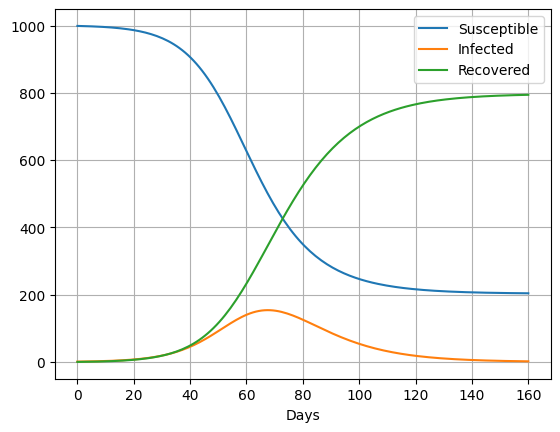

In [ ]:
#Inputs
N = 1000 #Total population
beta, gamma = 0.2, 1.0/10

#Initial conditions (initial values of Infected, Recovered and Susceptible population)
I0, R0 = 1,0  # Initial value of Infected and Recovered at time 0
S0 = 999      # At time 0, people susceptible in the population
# Initial conditions vector
y0 = S0, I0, R0

# The SIR model differential equations Model.
def SIRmodel(y, t, N, beta, gamma):
  S, I, R = y     # values of various compartments at time t-1
  dS_dt = -(beta*S*I)/N        # rate of change in susceptible population
  dI_dt =  ((beta*S*I)/N)-gamma*I       # rate of change in infected population
  dR_dt = gamma*I        # rate of change in recovered population
  return dS_dt, dI_dt, dR_dt # return for change in various compartmental values at time t

#timepoints
t = np.linspace(0, 160, 160)

# Integrate/Simulate the SIR equations over the time grid, t.
eqn = odeint(SIRmodel, y0, t, args=(N, beta, gamma))

S, I, R = eqn.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(t,S, label='Susceptible')
plt.plot(t,I, label='Infected')
plt.plot(t,R, label='Recovered')
plt.legend()
plt.xlabel('Days')
plt.grid()
print(max(I))

# **(!) Submission Required**

Suppose in the above SIR model, the recovered people may lose immunity after *k* days on an average, and again become susceptible to the disease. Hence the equations become:

$\displaystyle \frac{dS}{dt}= R/k -\frac{\beta S I}{N}$,

$\displaystyle \frac{dI}{dt}= \frac{\beta S I}{N} - \gamma I$,

$\displaystyle \frac{dR}{dt}=\gamma I - R/k$  

Suppose $k=60$ days. All other parameters are as given earlier. Simulate this (SIRS) model.


174.3060639704286


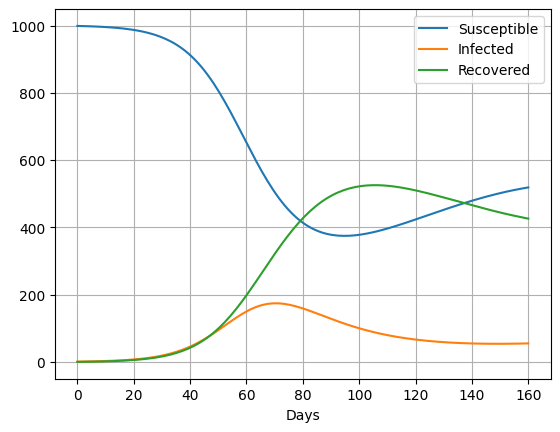

In [ ]:
N = 1000 #Total population
beta, gamma = 0.2, 1.0/10
k=60

#Initial conditions (initial values of Infected, Recovered and Susceptible population)
I0, R0 = 1,0  # Initial value of Infected and Recovered at time 0
S0 = 999      # At time 0, people susceptible in the population
# Initial conditions vector
y0 = S0, I0, R0

# The SIR model differential equations Model.
def SIRmodel(y, t, N, beta, gamma):
  S, I, R = y     # values of various compartments at time t-1
  dS_dt = (R/k)-(beta*S*I)/N        # rate of change in susceptible population
  dI_dt =  ((beta*S*I)/N)-gamma*I       # rate of change in infected population
  dR_dt = gamma*I -R/k      # rate of change in recovered population
  return dS_dt, dI_dt, dR_dt # return for change in various compartmental values at time t

#timepoints
t = np.linspace(0, 160, 160)

# Integrate/Simulate the SIR equations over the time grid, t.
eqn = odeint(SIRmodel, y0, t, args=(N, beta, gamma))

S, I, R = eqn.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(t,S, label='Susceptible')
plt.plot(t,I, label='Infected')
plt.plot(t,R, label='Recovered')
plt.legend()
plt.xlabel('Days')
plt.grid()
print(max(I))